In [1]:
from pipe import *
from matplotlib import pyplot as plt

In [2]:
filename='./snapshot_002.hdf5'
my_snapshot=read_Gadget4(filename)
my_pos=my_snapshot.read_pos()

In [15]:
nn=1000
my_pos=np.random.uniform(0,300,size=(nn,3))

In [48]:
my_2pct=twopcf(my_pos,random_scale=20,boxscale=[0,300])

In [49]:
psi,array=my_2pct.Natural(bins=10)
DP_psi,array=my_2pct.DP(bins=10)
Hamilton_psi,array=my_2pct.Hamilton(bins=10)
LS_psi,array=my_2pct.LS(bins=10)

Progress: 100%|██████████| 999/999 [00:00<00:00, 19512.02it/s]


make DD done


Progress: 100%|██████████| 19999/19999 [00:04<00:00, 4737.11it/s] 


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 27706.14it/s]


make DD done


Progress: 100%|██████████| 999/999 [00:00<00:00, 2489.87it/s]


make DR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 27800.99it/s]


make DD done


Progress: 100%|██████████| 19999/19999 [00:04<00:00, 4671.85it/s]


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 2533.60it/s]


make DR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 27400.49it/s]


make DD done


Progress: 100%|██████████| 19999/19999 [00:04<00:00, 4801.81it/s] 


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 2569.76it/s]

make DR done


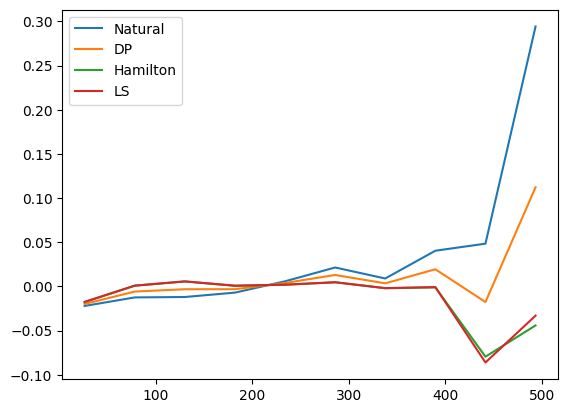

In [50]:
plt.plot(array,psi,label='Natural')
plt.plot(array,DP_psi,label='DP')
plt.plot(array,Hamilton_psi,label='Hamilton')
plt.plot(array,LS_psi,label='LS')
plt.legend()

In [33]:
    np.sum(psi**2)

np.float64(3.124428697799199)

In [34]:
np.sum(Hamilton_psi**2)

np.float64(nan)

In [35]:
np.sum(LS_psi**2)

np.float64(4.30132527309533)

In [9]:
my_2pct=twopcf(my_pos,random_scale=10,boxscale=[0,my_snapshot.boxsize])

In [10]:
psi,array=my_2pct.Natural(bins=40)
DP_psi,array=my_2pct.DP(bins=40)
Hamilton_psi,array=my_2pct.Hamilton(bins=40)
LS_psi,array=my_2pct.LS(bins=40)

Progress: 100%|██████████| 999/999 [00:00<00:00, 27114.31it/s]


make DD done


Progress: 100%|██████████| 9999/9999 [00:01<00:00, 7988.76it/s] 
/Users/gimhyeon/my_code/2pcf/pipe.py:29: RuntimeWarning: invalid value encountered in divide
  return (self.DD/self.RR)-1 ,array


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 26885.36it/s]


make DD done


Progress: 100%|██████████| 999/999 [00:00<00:00, 4568.70it/s]


make DR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 27793.06it/s]


make DD done


Progress: 100%|██████████| 9999/9999 [00:01<00:00, 7956.70it/s] 


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 4527.10it/s]


make DR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 27765.44it/s]


make DD done


Progress: 100%|██████████| 9999/9999 [00:01<00:00, 8023.04it/s] 


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 4589.58it/s]

make DR done



/Users/gimhyeon/my_code/2pcf/pipe.py:61: RuntimeWarning: invalid value encountered in divide
  return (self.DD-2*self.DR+self.RR)/self.RR, array


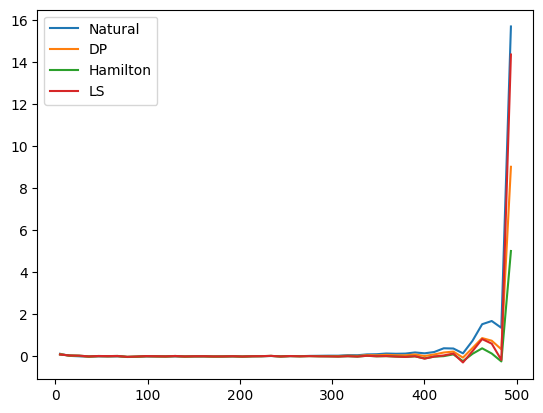

In [11]:
plt.plot(array,psi,label='Natural')
plt.plot(array,DP_psi,label='DP')
plt.plot(array,Hamilton_psi,label='Hamilton')
plt.plot(array,LS_psi,label='LS')
plt.legend()

In [12]:
np.sum(psi**2)

np.float64(nan)

In [13]:
np.sum(LS_psi**2)

np.float64(nan)